In [9]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [11]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [12]:
 %config Completer.use_jedi = False

In [15]:
df = pd.read_excel('C:/Users/djain/Downloads/archive/HotelFinalDataset.xlsx')

In [16]:
df

,Unnamed: 0,Name,Place,Type,Price,ReviewsCount,Rating,City,State
0,0,BUNK Hotel Amsterdam,"Amsterdam Noord, Amsterdam",Bunk Pod for 2,"₹ 7,887",778.0,8.4,Amsterdam Noord,Amsterdam
1,1,YOTEL Amsterdam,"Amsterdam Noord, Amsterdam",Premium Double Room,"₹ 15,267",500.0,8.1,Amsterdam Noord,Amsterdam
2,2,Multatuli Hotel,"Amsterdam City Center, Amsterdam",Double Room,"₹ 13,063",1605.0,7.4,Amsterdam City Center,Amsterdam
3,3,nhow Amsterdam Rai,"Zuideramstel, Amsterdam",nhow Double or Twin Room with View,"₹ 12,854",500.0,9.0,Zuideramstel,Amsterdam
4,4,Motel One Amsterdam,"Zuideramstel, Amsterdam",Double Room,"₹ 9,471",500.0,8.8,Zuideramstel,Amsterdam
...,...,...,...,...,...,...,...,...,...
520,520,Stadslogement Bij de Sassenpoort,Zwolle,Superior Apartment,"₹ 8,899",232.0,8.4,Zwolle,NaN
521,521,Mercure Hotel Zwolle,Zwolle,Standard Double Room,"₹ 10,205",1402.0,7.7,Zwolle,NaN
522,522,The Cabin at Zwolle Centraal,Zwolle,Double Room with Private Bathroom,"₹ 6,123",149.0,7.2,Zwolle,NaN
523,523,Hanze Hotel Zwolle,Zwolle,Standard Twin Room,"₹ 7,789",1095.0,7.2,Zwolle,NaN


In [17]:
df = df.drop(['Unnamed: 0', 'Place'], axis=1)
df

,Name,Type,Price,ReviewsCount,Rating,City,State
0,BUNK Hotel Amsterdam,Bunk Pod for 2,"₹ 7,887",778.0,8.4,Amsterdam Noord,Amsterdam
1,YOTEL Amsterdam,Premium Double Room,"₹ 15,267",500.0,8.1,Amsterdam Noord,Amsterdam
2,Multatuli Hotel,Double Room,"₹ 13,063",1605.0,7.4,Amsterdam City Center,Amsterdam
3,nhow Amsterdam Rai,nhow Double or Twin Room with View,"₹ 12,854",500.0,9.0,Zuideramstel,Amsterdam
4,Motel One Amsterdam,Double Room,"₹ 9,471",500.0,8.8,Zuideramstel,Amsterdam
...,...,...,...,...,...,...,...
520,Stadslogement Bij de Sassenpoort,Superior Apartment,"₹ 8,899",232.0,8.4,Zwolle,NaN
521,Mercure Hotel Zwolle,Standard Double Room,"₹ 10,205",1402.0,7.7,Zwolle,NaN
522,The Cabin at Zwolle Centraal,Double Room with Private Bathroom,"₹ 6,123",149.0,7.2,Zwolle,NaN
523,Hanze Hotel Zwolle,Standard Twin Room,"₹ 7,789",1095.0,7.2,Zwolle,NaN


In [18]:
df.isna().sum()

Name              0
Type              0
Price             0
ReviewsCount     13
Rating           10
City              0
State           392
dtype: int64

In [19]:
df = df[df['ReviewsCount'].notna() & df['Rating'].notna()]

In [20]:
df.groupby('Type').Name.count()

Type
 Deluxe double or Twin Room                       1
1 Queen or King Bed Essential Room                1
2-person Premium Hotelroom                        1
6 Person Room with Private Bathroom and Shower    1
Apartment                                         2
                                                 ..
Two-Bedroom Chalet                                3
Two-Bedroom House                                 6
Two-Bedroom Suite                                 1
bunk                                              1
nhow Double or Twin Room with View                1
Name: Name, Length: 187, dtype: int64

In [21]:
data_set = df.Type.values
data_set = list(data_set)
data_set = ' '.join(data_set)

In [22]:
from collections import Counter
split_str = data_set.split()
  
Counter = Counter(split_str)

common = Counter.most_common(10)
  
print(common)

[('Room', 356), ('Double', 214), ('Twin', 102), ('with', 85), ('Standard', 79), ('Deluxe', 65), ('Apartment', 50), ('Comfort', 47), ('Bathroom', 35), ('One-Bedroom', 32)]


In [23]:
types = []
for tup in common:
    types.append(tup[0].lower())
print(types)

['room', 'double', 'twin', 'with', 'standard', 'deluxe', 'apartment', 'comfort', 'bathroom', 'one-bedroom']


In [28]:
df = df.drop(['Type'], axis=1)
#removing the currency symbol
df['Price'] = df['Price'].str.replace('₹', '')
df['Price'] = df['Price'].str.replace(',', '.')
df['Price'] = df['Price'].astype(float)

In [29]:
cities = pd.get_dummies(df['City'])
#one-hots for State
states =pd.get_dummies(df['State'])

In [30]:
df = df.join(cities)
df = df.join(states)
df

,Name,Price,ReviewsCount,Rating,City,State,Amsterdam City Center,Amsterdam Noord,Bemelen,Boschstraatkwartier,...,Zuid,Zuideramstel,Zuidwest,Zwolle,Amsterdam,Eindhoven,Maastricht,Rotterdam,The Hague,Utrecht
0,BUNK Hotel Amsterdam,7.887,778.0,8.4,Amsterdam Noord,Amsterdam,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
1,YOTEL Amsterdam,15.267,500.0,8.1,Amsterdam Noord,Amsterdam,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,Multatuli Hotel,13.063,1605.0,7.4,Amsterdam City Center,Amsterdam,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,nhow Amsterdam Rai,12.854,500.0,9.0,Zuideramstel,Amsterdam,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
4,Motel One Amsterdam,9.471,500.0,8.8,Zuideramstel,Amsterdam,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,Stadslogement Bij de Sassenpoort,8.899,232.0,8.4,Zwolle,NaN,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
521,Mercure Hotel Zwolle,10.205,1402.0,7.7,Zwolle,NaN,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
522,The Cabin at Zwolle Centraal,6.123,149.0,7.2,Zwolle,NaN,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
523,Hanze Hotel Zwolle,7.789,1095.0,7.2,Zwolle,NaN,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [31]:
Names = df['Name']
df = df.drop(['Name', 'City', 'State'], axis=1)

In [32]:
df

,Price,ReviewsCount,Rating,Amsterdam City Center,Amsterdam Noord,Bemelen,Boschstraatkwartier,Breda,Centrum,City Centre,...,Zuid,Zuideramstel,Zuidwest,Zwolle,Amsterdam,Eindhoven,Maastricht,Rotterdam,The Hague,Utrecht
0,7.887,778.0,8.4,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,15.267,500.0,8.1,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,13.063,1605.0,7.4,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,12.854,500.0,9.0,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
4,9.471,500.0,8.8,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,8.899,232.0,8.4,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
521,10.205,1402.0,7.7,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
522,6.123,149.0,7.2,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
523,7.789,1095.0,7.2,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


<Axes: >

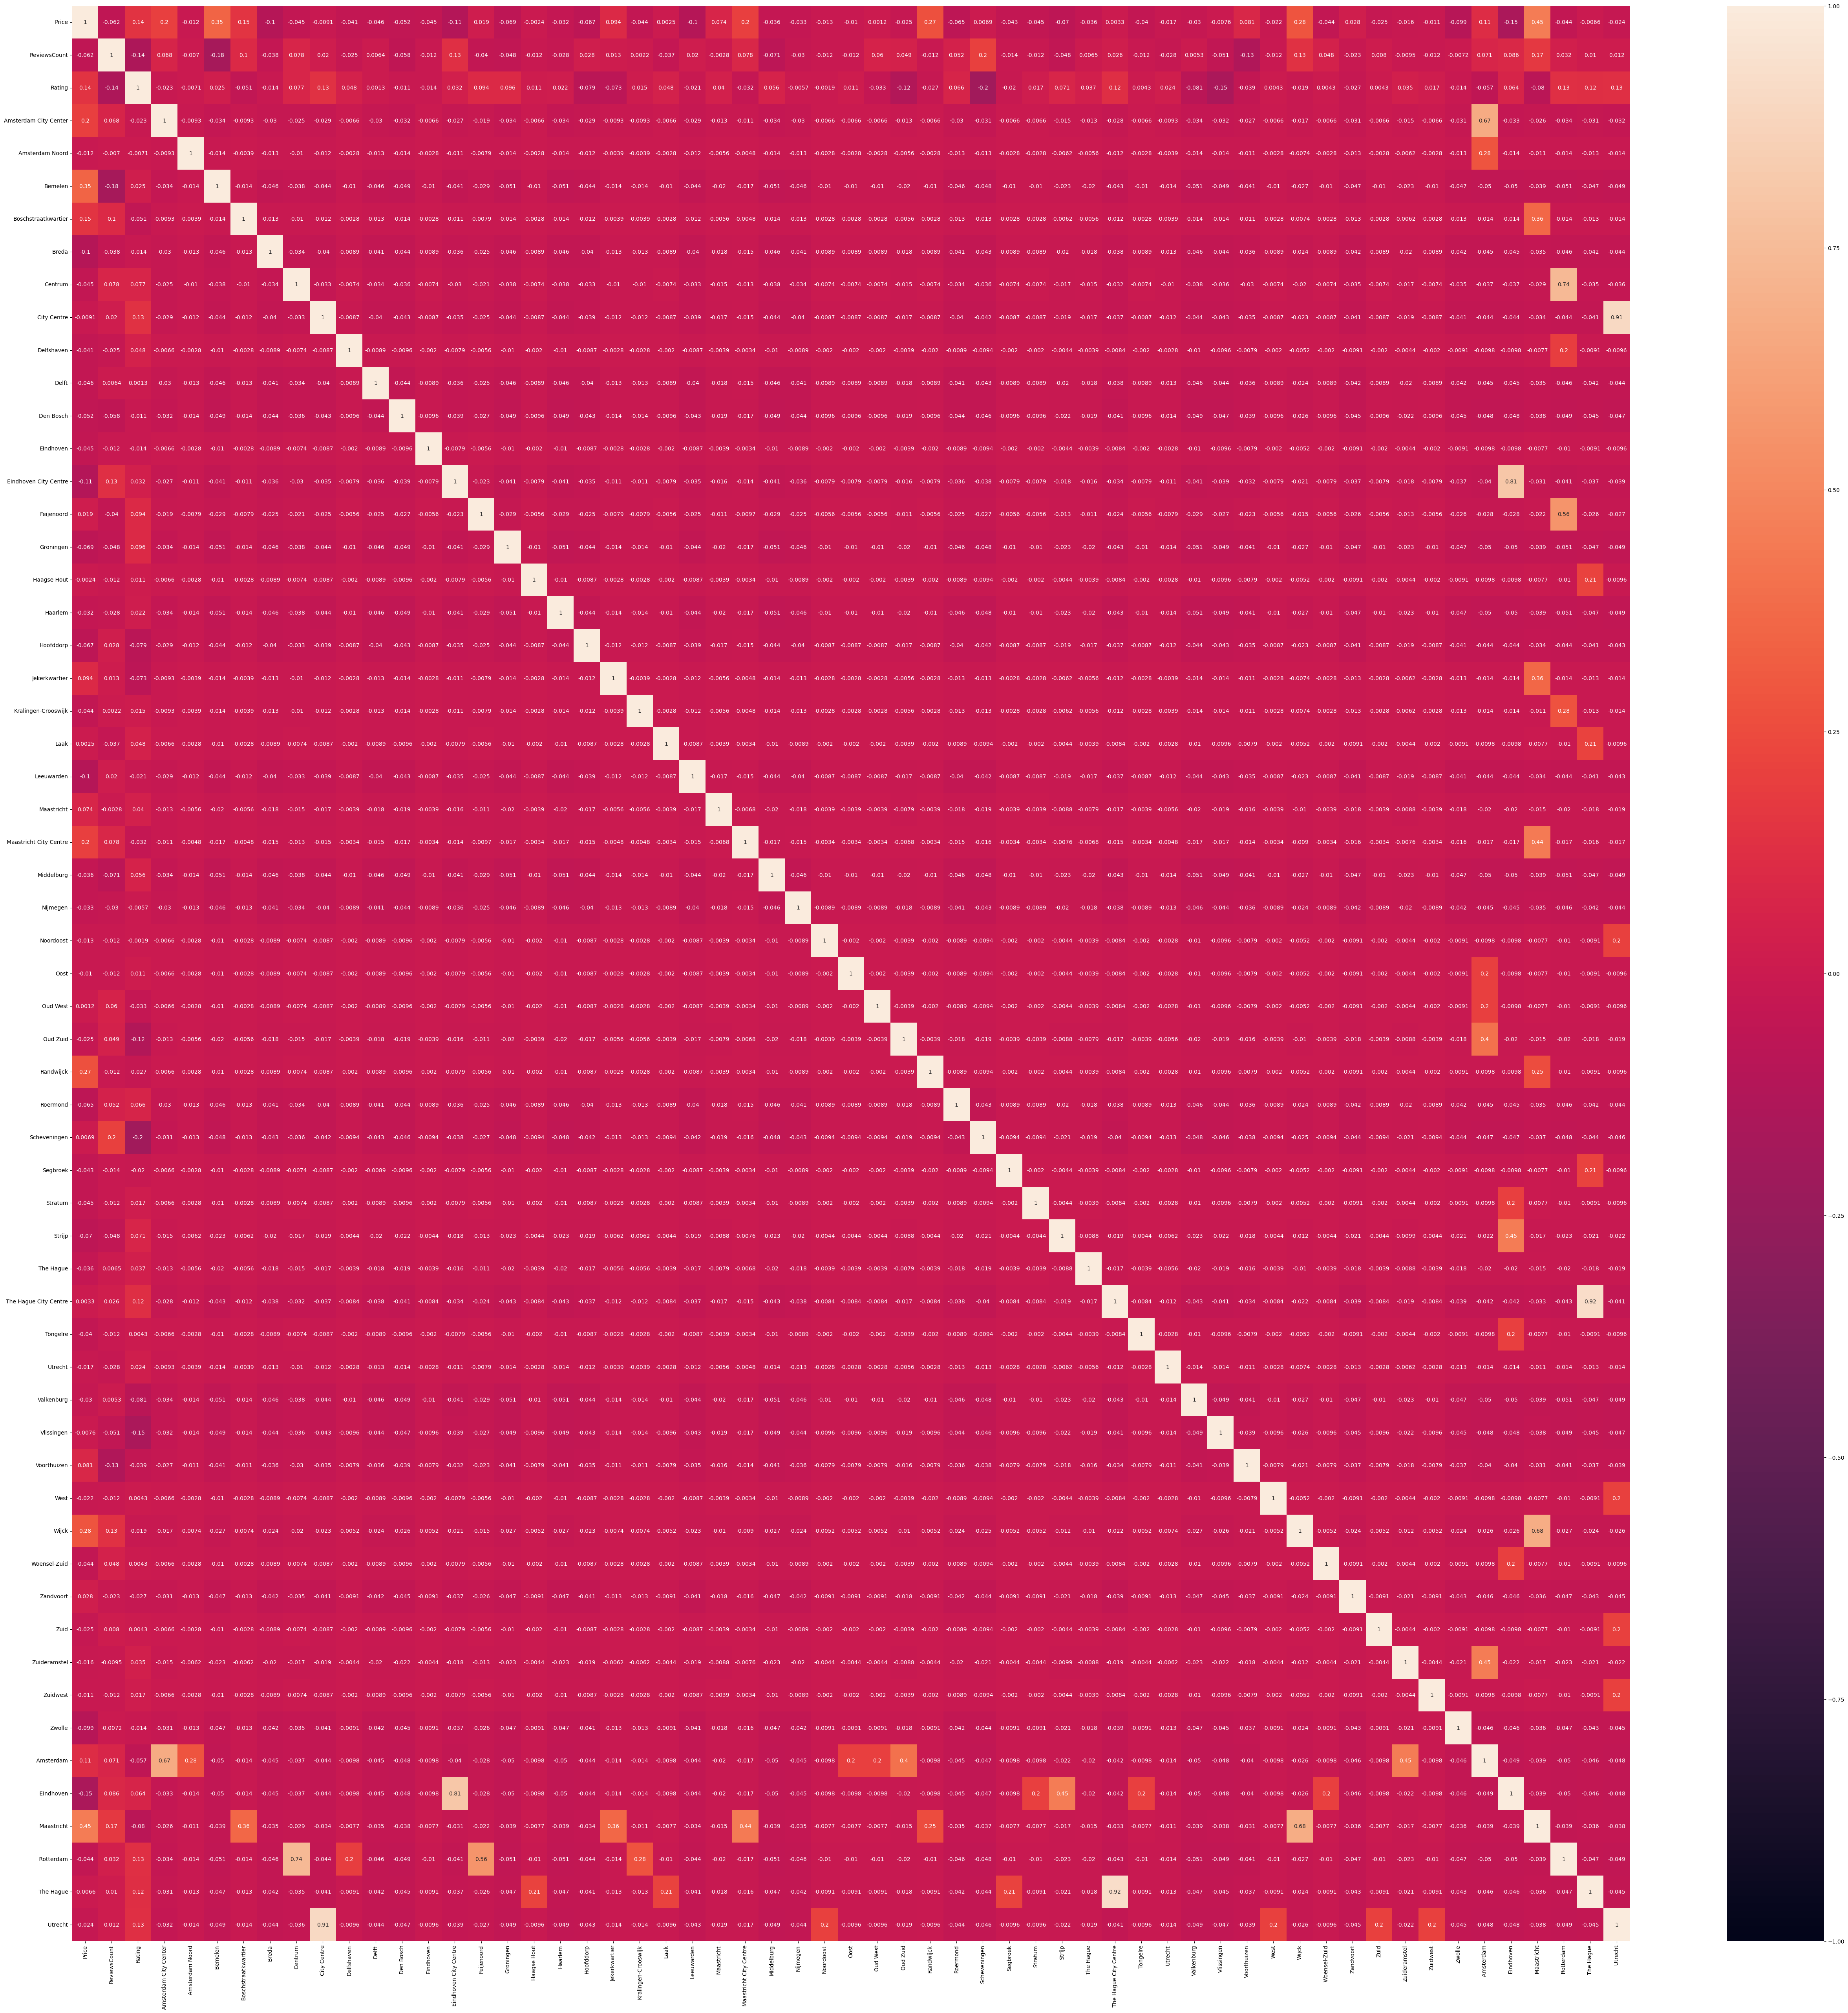

In [33]:
plt.figure(figsize=(64, 64))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

In [34]:
df

,Price,ReviewsCount,Rating,Amsterdam City Center,Amsterdam Noord,Bemelen,Boschstraatkwartier,Breda,Centrum,City Centre,...,Zuid,Zuideramstel,Zuidwest,Zwolle,Amsterdam,Eindhoven,Maastricht,Rotterdam,The Hague,Utrecht
0,7.887,778.0,8.4,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,15.267,500.0,8.1,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,13.063,1605.0,7.4,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,12.854,500.0,9.0,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
4,9.471,500.0,8.8,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,8.899,232.0,8.4,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
521,10.205,1402.0,7.7,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
522,6.123,149.0,7.2,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
523,7.789,1095.0,7.2,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [35]:
df[['Price', 'ReviewsCount', 'Rating']].describe()

,Price,ReviewsCount,Rating
count,512.000000,512.000000,512.000000
mean,12.812465,736.556641,8.330273
std,6.514815,879.553639,0.713554
min,3.988000,1.000000,3.700000
25%,8.693000,239.000000,8.000000
50%,11.199500,500.000000,8.400000
75%,14.288000,888.000000,8.800000
max,53.439000,7748.000000,10.000000


In [37]:
q_low = df['Price'].quantile(0.01)
q_hi  = df['Price'].quantile(0.99)

df = df[(df['Price'] < q_hi) & (df['Price'] > q_low)]
q_low = df['ReviewsCount'].quantile(0.01)
q_hi  = df['ReviewsCount'].quantile(0.99)

df= df[(df['ReviewsCount'] < q_hi) & (df['ReviewsCount'] > q_low)]

In [38]:
df[['Price', 'ReviewsCount', 'Rating']].describe()

,Price,ReviewsCount,Rating
count,470.000000,470.000000,470.000000
mean,12.187070,705.597872,8.347872
std,4.915446,723.236886,0.691331
min,5.633000,2.000000,3.700000
25%,8.817000,265.500000,8.000000
50%,11.022000,500.000000,8.400000
75%,13.853000,873.750000,8.800000
max,31.228000,3803.000000,9.800000


In [40]:
df=(df-df.mean())/df.std()

In [41]:
print(df.isna().sum().to_string())

Price                       0
ReviewsCount                0
Rating                      0
Amsterdam City Center       0
Amsterdam Noord             0
Bemelen                     0
Boschstraatkwartier         0
Breda                       0
Centrum                     0
City Centre                 0
Delfshaven                  0
Delft                       0
Den Bosch                   0
Eindhoven                   0
Eindhoven City Centre       0
Feijenoord                  0
Groningen                   0
Haagse Hout                 0
Haarlem                     0
Hoofddorp                   0
Jekerkwartier               0
Kralingen-Crooswijk         0
Laak                        0
Leeuwarden                  0
Maastricht                  0
Maastricht City Centre      0
Middelburg                  0
Nijmegen                    0
Noordoost                   0
Oost                        0
Oud West                    0
Oud Zuid                    0
Randwijck                 470
Roermond  

In [42]:
df

,Price,ReviewsCount,Rating,Amsterdam City Center,Amsterdam Noord,Bemelen,Boschstraatkwartier,Breda,Centrum,City Centre,...,Zuid,Zuideramstel,Zuidwest,Zwolle,Amsterdam,Eindhoven,Maastricht,Rotterdam,The Hague,Utrecht
0,-0.874808,0.100108,0.075402,-0.147285,15.280776,-0.181375,-0.046127,-0.205034,-0.161695,-0.205034,...,-0.046127,-0.103585,-0.046127,-0.216035,4.403797,-0.221365,-0.139575,-0.216035,-0.216035,-0.226594
1,0.626582,-0.284275,-0.358544,-0.147285,15.280776,-0.181375,-0.046127,-0.205034,-0.161695,-0.205034,...,-0.046127,-0.103585,-0.046127,-0.216035,4.403797,-0.221365,-0.139575,-0.216035,-0.216035,-0.226594
2,0.178199,1.243579,-1.371084,6.775111,-0.065302,-0.181375,-0.046127,-0.205034,-0.161695,-0.205034,...,-0.046127,-0.103585,-0.046127,-0.216035,4.403797,-0.221365,-0.139575,-0.216035,-0.216035,-0.226594
3,0.135680,-0.284275,0.943294,-0.147285,-0.065302,-0.181375,-0.046127,-0.205034,-0.161695,-0.205034,...,-0.046127,9.633386,-0.046127,-0.216035,4.403797,-0.221365,-0.139575,-0.216035,-0.216035,-0.226594
4,-0.552558,-0.284275,0.653996,-0.147285,-0.065302,-0.181375,-0.046127,-0.205034,-0.161695,-0.205034,...,-0.046127,9.633386,-0.046127,-0.216035,4.403797,-0.221365,-0.139575,-0.216035,-0.216035,-0.226594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,-0.668926,-0.654831,0.075402,-0.147285,-0.065302,-0.181375,-0.046127,-0.205034,-0.161695,-0.205034,...,-0.046127,-0.103585,-0.046127,4.619032,-0.226594,-0.221365,-0.139575,-0.216035,-0.216035,-0.226594
521,-0.403233,0.962896,-0.937138,-0.147285,-0.065302,-0.181375,-0.046127,-0.205034,-0.161695,-0.205034,...,-0.046127,-0.103585,-0.046127,4.619032,-0.226594,-0.221365,-0.139575,-0.216035,-0.216035,-0.226594
522,-1.233676,-0.769593,-1.660381,-0.147285,-0.065302,-0.181375,-0.046127,-0.205034,-0.161695,-0.205034,...,-0.046127,-0.103585,-0.046127,4.619032,-0.226594,-0.221365,-0.139575,-0.216035,-0.216035,-0.226594
523,-0.894745,0.538416,-1.660381,-0.147285,-0.065302,-0.181375,-0.046127,-0.205034,-0.161695,-0.205034,...,-0.046127,-0.103585,-0.046127,4.619032,-0.226594,-0.221365,-0.139575,-0.216035,-0.216035,-0.226594


In [43]:
df = df.drop('Randwijck', axis=1)

In [44]:
random_state = 0

#We prepare the test and training sets
X = df.drop(['Price'],axis = 1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
model_1 = LinearRegression()
cv = 4 
print("R2:")
print(cross_val_score(model_1, X_train.values, y_train.values, cv=cv).mean())
print("MSE:")
print(cross_val_score(model_1, X_train.values, y_train.values, cv=cv, scoring='neg_mean_squared_error').mean())

R2:
-4.6848660221432464e+27
MSE:
-3.968140855591265e+27


In [46]:
model_1 = model_1.fit(X_train.values, y_train.values)
y_test_pred = model_1.predict(X_test.values)
xmin= min(y_test.min(), y_test_pred.min() )-1
xmax= max(y_test.max(), y_test_pred.max() )+1

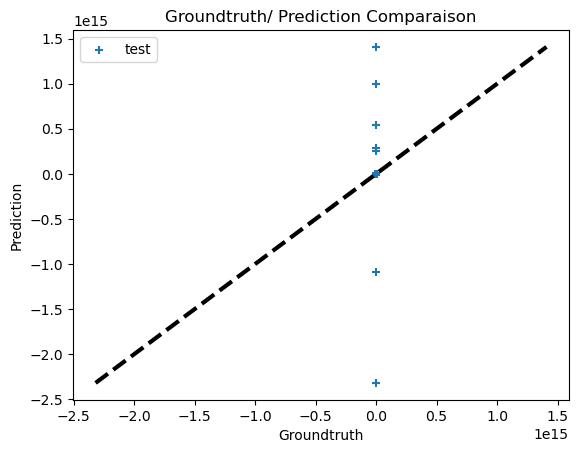

In [47]:
fig = plt.figure(1)
plt.scatter(y_test,y_test_pred, marker='+', label='test')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='k', ls='--') ## droite separatrice d'equation x2=x1

plt.xlabel('Groundtruth')
plt.ylabel('Prediction') 
plt.title('Groundtruth/ Prediction Comparaison')
plt.legend()
plt.savefig('LR.png')

In [48]:
model_2 = RandomForestRegressor(random_state= random_state)
print("R2:")
print(cross_val_score(model_2, X_train.values, y_train.values, cv=cv).mean())
print("MSE:")
print(-cross_val_score(model_2, X_train.values, y_train.values, cv=cv, scoring='neg_mean_squared_error').mean())

R2:
0.31750932691224365
MSE:
0.6778603205288276


In [49]:
model_2 = model_2.fit(X_train.values, y_train.values)
y_test_pred = model_2.predict(X_test.values)
xmin= min(y_test.min(), y_test_pred.min() )-1
xmax= max(y_test.max(), y_test_pred.max() )+1

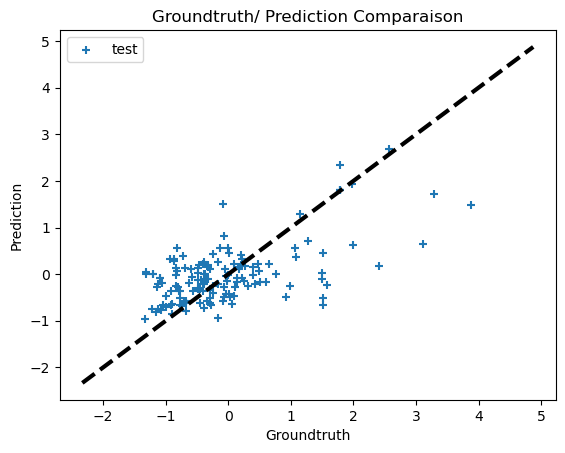

In [50]:
fig = plt.figure(1)
plt.scatter(y_test,y_test_pred, marker='+', label='test')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='k', ls='--') ## droite separatrice d'equation x2=x1

plt.xlabel('Groundtruth')
plt.ylabel('Prediction') 
plt.title('Groundtruth/ Prediction Comparaison')
plt.legend()
plt.savefig('RF.png')